<a href="https://colab.research.google.com/github/alupo933/Python-Work-for-Bootcamp/blob/main/Classification_Tree_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
import seaborn as sns
from sklearn import set_config
set_config(display='diagram')

In [2]:
filename = '/content/drive/MyDrive/Coding Dojo Data Science Boot Camp/Excel Files/cancer.csv'
df = pd.read_csv(filename)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df['diagnosis'].value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [5]:
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})

1) decision tree classifier

In [7]:
y = df['diagnosis']
X = df.drop(columns = ['id', 'diagnosis'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)

Fit the dec_tree to my training data

In [9]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Test and predict the data

In [10]:
train_prediciton = dec_tree.predict(X_train)
test_prediction = dec_tree.predict(X_test)

In [13]:
# Evaluate the model
training_score = dec_tree.score(X_train, y_train)
testing_score = dec_tree.score(X_test, y_test)
print(training_score)
print(testing_score)

1.0
0.951048951048951


In [14]:
dec_tree.get_depth()

7

In [19]:
# List values to try to find max_depth:
max_depth_range = list(range(2,10))
# List to store the score for each value of max_depth
r2 = []
for depth in max_depth_range:
  dec_tree = DecisionTreeClassifier(max_depth= depth,
                                    random_state = 42)
  dec_tree.fit(X_train, y_train)
  score = dec_tree.score(X_test, y_test)
  r2.append(score)

Text(0, 0.5, 'R2 Score')

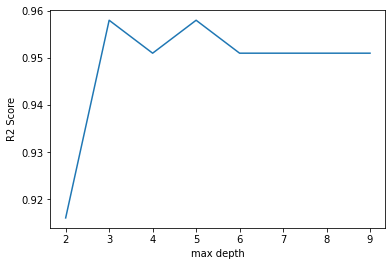

In [20]:
plt.plot(max_depth_range, r2)
plt.xlabel('max depth')
plt.ylabel('R2 Score')

2) Baggin Classifier

In [22]:
# Import the Bagging Classifier
from sklearn.ensemble import BaggingClassifier

Instantiate the Bagging Classifier

In [23]:
baggin_classifier = BaggingClassifier(random_state = 42)

In [24]:
baggin_classifier.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Training the model on the data, storing the information learned from the data

In [25]:
baggin_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=42)

Predict the values of the testing target

In [26]:
baggin_classifier.predict(X_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0])

Evaluate your model

In [27]:
bag_class_training_score = baggin_classifier.score(X_train, y_train)
bag_class_test_score = baggin_classifier.score(X_test, y_test)
print(bag_class_training_score)
print(bag_class_test_score)

0.9929577464788732
0.951048951048951


The above data shows the model is an accurate model

Random Forest Classsifer

In [28]:
# Instantiate the Random Forest Regressor
from sklearn.ensemble import RandomForestClassifier

Make an instance of the model

In [29]:
RFC = RandomForestClassifier(random_state = 42)

Train the mdoel on the data storing the information learned form the data

In [30]:
RFC.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Predict the Values for Y

In [31]:
RFC.predict(X_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

Evaluate the model

In [33]:
RFC_train_score = RFC.score(X_train, y_train)
RFC_test_score = RFC.score(X_test, y_test)
print(RFC_train_score)
print(RFC_test_score)

1.0
0.965034965034965
